# Trends in Reported Crime data

This notebook investigates whether there is evidence of consistent trends in the reported crime data.

## Set up BigQuery

In [3]:
import pandas as pd
from google.cloud import bigquery
client = bigquery.Client()
dataset_ref = client.dataset("reported_crime_data", project = "newsletter-analysis")
table_ref = dataset_ref.table("all_locations_and_violations")
table = client.get_table(table_ref)
table.schema

[SchemaField('REF_DATE', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('GEO', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('Violations', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('Statistics', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('VALUE', 'FLOAT', 'NULLABLE', None, (), None)]

## Total Violations in Waterloo Region

This section looks at trends in the rate of Total Violations in Waterloo Region.

In [15]:
query = '''SELECT REF_DATE, VALUE
            FROM `newsletter-analysis.reported_crime_data.all_locations_and_violations`
            WHERE GEO = 'Kitchener-Cambridge-Waterloo, Ontario [35541]' 
                and Violations = 'Total, all violations [0]' 
                and Statistics = 'Rate per 100,000 population'
        '''
query_job = client.query(query)
WR_rate_data = query_job.to_dataframe()
WR_rate_data.set_index('REF_DATE')
WR_rate_data.head()

,REF_DATE,VALUE
0,1998,7305.70
1,1999,6797.61
2,2000,6421.60
3,2001,6091.61
4,2002,6147.20


<AxesSubplot:ylabel='VALUE'>

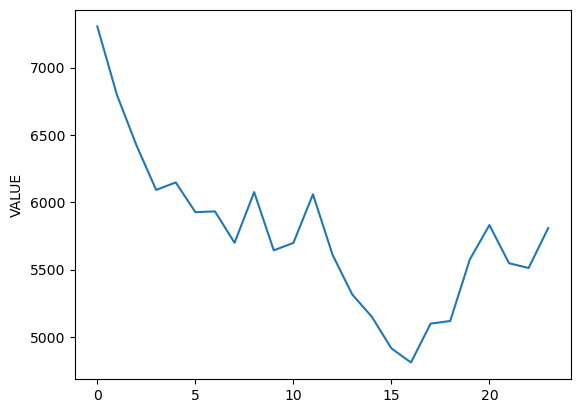

In [18]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.lineplot(data = WR_rate_data['VALUE'])

Extract data on percentage changes in rate for comparison.

In [10]:
query = '''SELECT REF_DATE, VALUE
            FROM `newsletter-analysis.reported_crime_data.all_locations_and_violations`
            WHERE GEO = 'Kitchener-Cambridge-Waterloo, Ontario [35541]' 
                and Violations = 'Total, all violations [0]' 
                and Statistics = 'Percentage change in rate'
        '''
query_job = client.query(query)
WR_change_data = query_job.to_dataframe()
WR_change_data.head()

,REF_DATE,VALUE
0,1999,-6.95
1,2000,-5.53
2,2001,-5.14
3,2002,0.91
4,2003,-3.59


<AxesSubplot:ylabel='VALUE'>

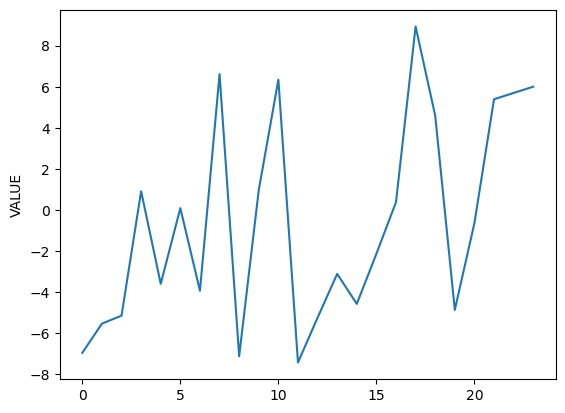

In [17]:
sns.lineplot(data = WR_change_data['VALUE'])